# Data Augmentation Visualization

This notebook demonstrates the augmentation techniques applied in the Fetal Head Segmentation project.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from pathlib import Path

# Configure matplotlib for better visualization
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12

In [6]:
# Load sample image
image_path = Path('../shared/dataset_v5/training_set/images/004_HC.png')
image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)

# Resize to 256x256 (as per project spec)
image = cv2.resize(image, (256, 256))

# Normalize to [0, 1]
image_normalized = image.astype(np.float32) / 255.0

print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
print(f"Normalized image range: [{image_normalized.min():.2f}, {image_normalized.max():.2f}]")

Image shape: (256, 256)
Image dtype: uint8
Normalized image range: [0.00, 0.97]


In [7]:
# Define augmentation transforms (matching project specs)

# Rotation: -20 degrees
rotate_transform = A.Compose([
    A.Rotate(limit=(-20, -20), p=1.0, border_mode=cv2.BORDER_CONSTANT, value=0)
])

# Horizontal flip
flip_transform = A.Compose([
    A.HorizontalFlip(p=1.0)
])

# Shift/Scale (zoom): 10% scale and 10% shift
shift_scale_transform = A.Compose([
    A.ShiftScaleRotate(
        shift_limit=0.1, 
        scale_limit=0.1, 
        rotate_limit=0, 
        p=1.0,
        border_mode=cv2.BORDER_CONSTANT,
        value=0
    )
])

In [8]:
# Apply augmentations
rotated = rotate_transform(image=image_normalized)['image']
flipped = flip_transform(image=image_normalized)['image']
shifted_scaled = shift_scale_transform(image=image_normalized)['image']

print("Augmentations applied successfully!")

Augmentations applied successfully!


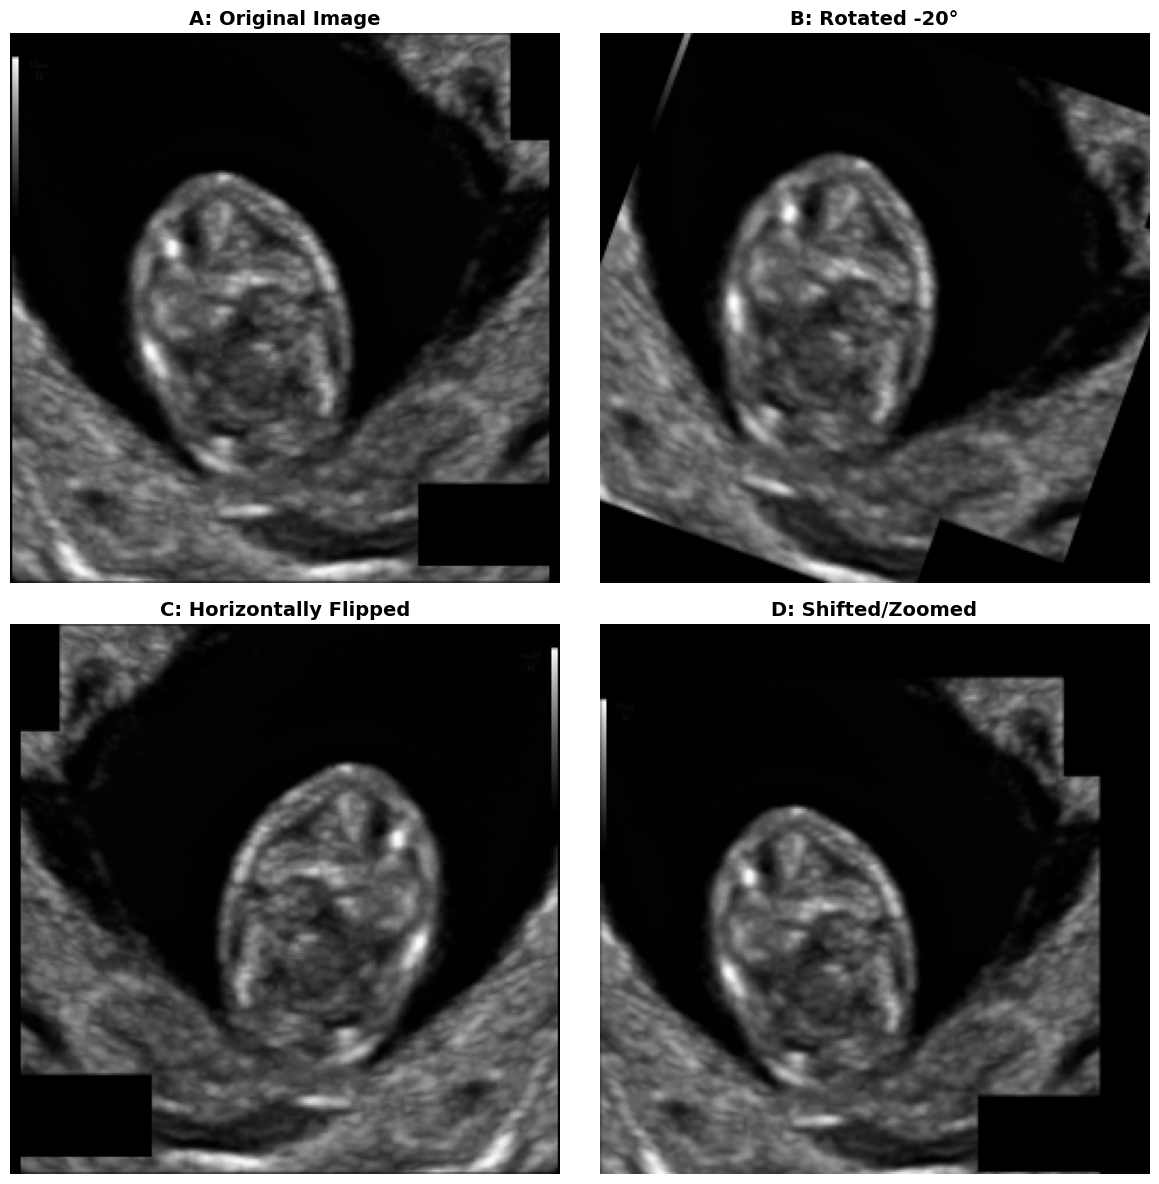


Visualization saved to: ../docs/augmentation_demonstration.png


In [9]:
# Create visualization with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Image A: Original
axes[0, 0].imshow(image_normalized, cmap='gray')
axes[0, 0].set_title('A: Original Image', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

# Image B: Rotated -20 degrees
axes[0, 1].imshow(rotated, cmap='gray')
axes[0, 1].set_title('B: Rotated -20°', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

# Image C: Horizontally Flipped
axes[1, 0].imshow(flipped, cmap='gray')
axes[1, 0].set_title('C: Horizontally Flipped', fontsize=14, fontweight='bold')
axes[1, 0].axis('off')

# Image D: Shifted/Zoomed
axes[1, 1].imshow(shifted_scaled, cmap='gray')
axes[1, 1].set_title('D: Shifted/Zoomed', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('../docs/augmentation_demonstration.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nVisualization saved to: ../docs/augmentation_demonstration.png")

## Augmentation Parameters

Based on the project configuration (`shared/configs/augmentation_config.yaml`):

- **Horizontal Flip**: p=0.5 (randomly applied during training)
- **Rotation**: ±20° limit, p=0.5 (randomly applied during training)
- **Shift/Scale**: 
  - Shift limit: ±10%
  - Scale limit: ±10%
  - p=0.5 (randomly applied during training)
- **Image Size**: 256×256 pixels
- **Normalization**: [0, 1] range

For this demonstration, each augmentation is applied with p=1.0 to clearly show the effect.